##### ----------------------Notes---------------------
* This code DOES NOT use regridded datafiles.

##### ------------------------------------------------

### Set up workspace

In [ ]:
import sys
sys.path.append('../')

In [2]:
######################## Load modules ###################################
%matplotlib inline
import importlib
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.analyze_data import make_tcr_dataset
from plants_and_TCR.process_data import calculate_tcr_time_series
from plants_and_TCR.generate_figures import plot_scatter_CMIP

####################### Set up directory structure ######################
PATH_REGRIDDED_DATA = directory_information.DIR_PROCESSED_DATA
PATH_FIGURES = directory_information.DIR_OUTPUT_FIGURES

# Calculate TCRs

In [ ]:
#Calculate from scratch
TCR_DICT = calculate_tcr_time_series.create_tcr_datasets(tcr_types=['RAD','TOT','PHYS','TOT-RAD'],
                                                         average_types=['global','land'],
                                                         save_tcr_dict=True,
                                                         recalculate_TCRs=True)

In [3]:
# Load precalculated
DIR_TCR_DICT = directory_information.DIR_TCR_DICT
TCR_DICT = pickle.load(open(DIR_TCR_DICT+'TCR_dict.pickle', "rb"))

In [4]:
end_yr = 70
cmip_cutoff = 8

In [5]:
globalTCR = make_tcr_dataset.make_tcr_dataset(TCR_DICT,
                                              end_yr=end_yr,
                                              varname='tas',
                                              average_type='global',
                                              tcr_types=['RAD','TOT'])
globalTCR_CMIP5 = globalTCR[0:cmip_cutoff]
globalTCR_CMIP6 = globalTCR[cmip_cutoff:len(globalTCR)]

In [6]:
landTCR = make_tcr_dataset.make_tcr_dataset(TCR_DICT,
                                              end_yr=end_yr,
                                              varname='tas',
                                              average_type='land',
                                              tcr_types=['RAD','TOT'])
landTCR_CMIP5 = landTCR[0:cmip_cutoff]
landTCR_CMIP6 = landTCR[cmip_cutoff:len(landTCR)]

# Make Figure 2

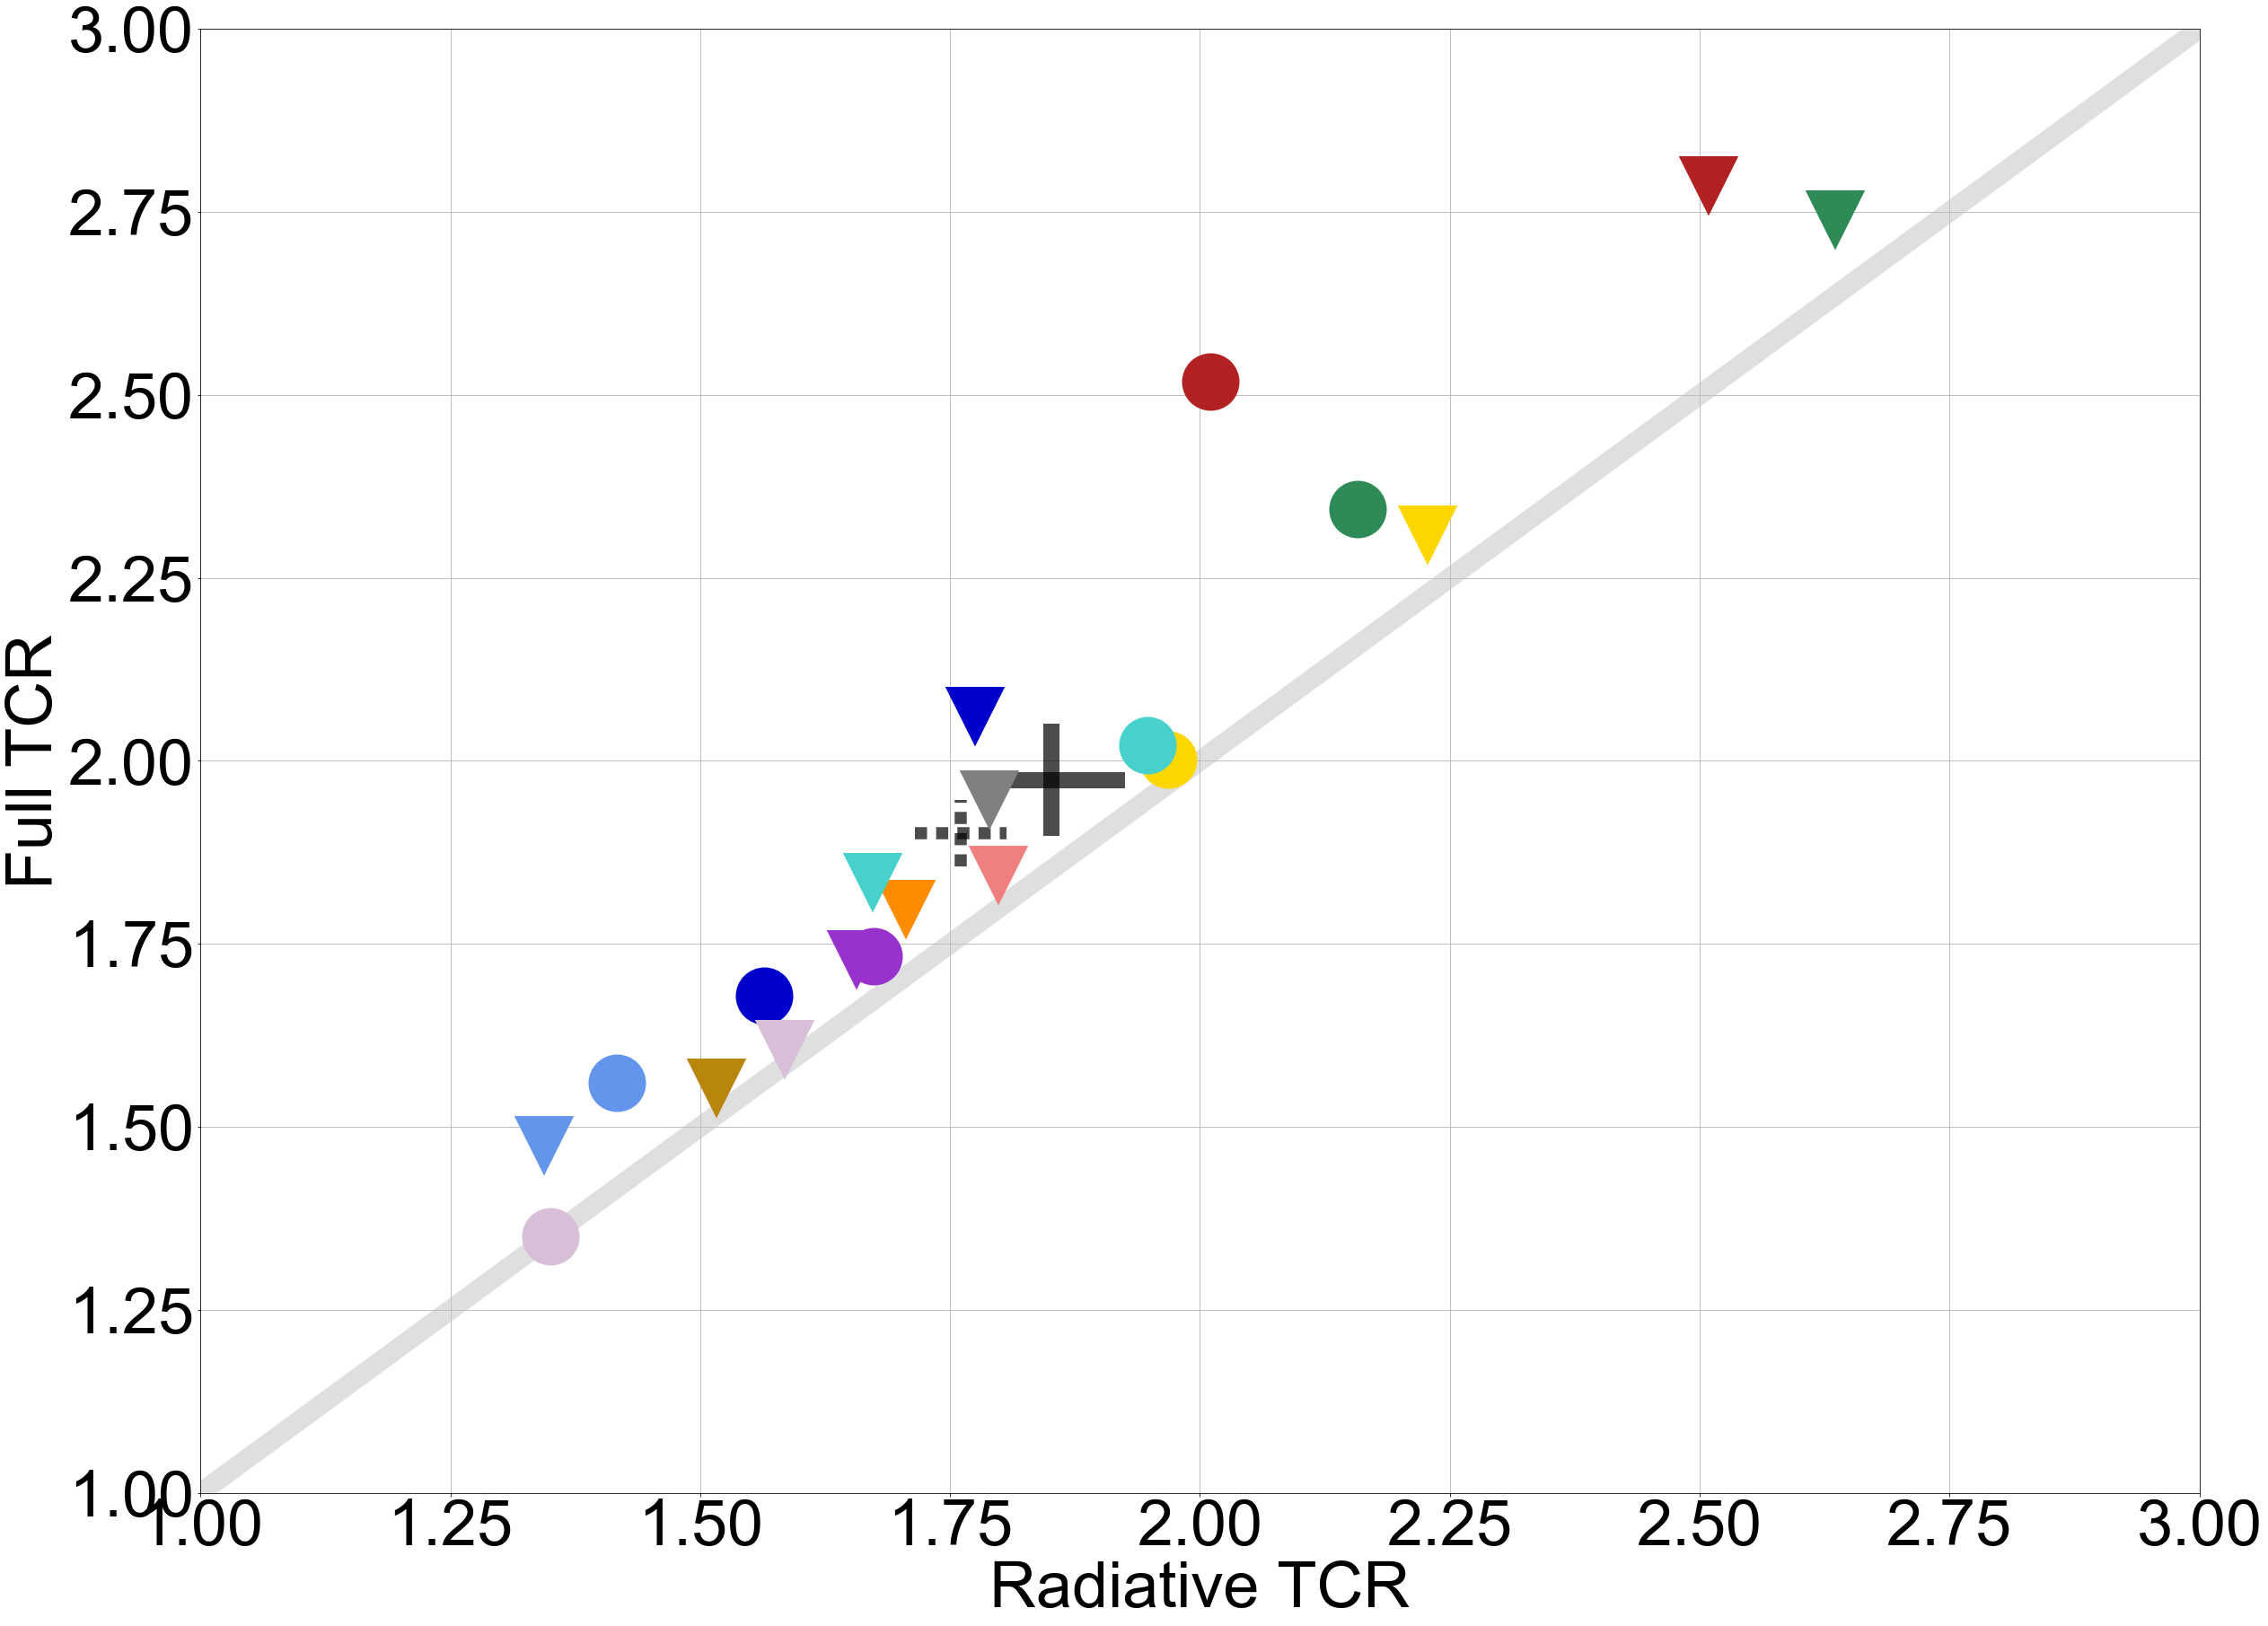

In [7]:
xvals = globalTCR['RAD'].values
yvals = globalTCR['TOT'].values

XLIMS = [1,3]; #[1.5,6.5];
YLIMS = [1,3]; #[1.5,6.5];
XLABEL = 'Radiative TCR';
YLABEL = 'Full TCR';
plot_scatter_CMIP.plot_scatter_CMIP(xvals, yvals,
                                    one_to_one_line=True,
                                    xlims=XLIMS, ylims=YLIMS,
                                    xlabel=XLABEL, ylabel=YLABEL,
                                    legend_on=False, filled=True, dt=0.25,
                                    cross_scalar=[0.065532475,0.065532475,
                                                  0.04579075,0.04579075],
                                    filepath=PATH_FIGURES+'Fig4_RADvsFULL_TCR', 
                                    markersize=60, ncols=5)